In [110]:
#importing packages
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from Utility.IO import *


In [3]:
dic=load_dictionary()

In [4]:
dic.head()

,desc,category,name
0,Unit ID for institution,root,UNITID
1,8-digit OPE ID for institution,root,OPEID
2,6-digit OPE ID for institution,root,OPEID6
6,ZIP code,school,ZIP
10,Predominant degree awarded (recoded 0s and 4s),school,SCH_DEG


In [5]:
cat_list0=dic.category.unique()
cat_list=np.delete(cat_list0,[0,8])
cat_list

array([u'school', u'admissions', u'academics', u'student', u'cost', u'aid',
       u'completion', u'earnings'], dtype=object)

In [197]:
rpyrt0=get_rpyrt_by_class(1)

In [201]:
rpyrt=rpyrt0
y=rpyrt.RPY_1YR_RT
rpyrt.RPY_1YR_RT=np.log(y/(1-y))

In [202]:
df=rpyrt
yname='RPY_'+ str(1) +'YR_RT'
cor=df.corr()
corr=abs(cor).sort_values([yname],ascending=0)[yname]

KeyboardInterrupt: 

In [ ]:
corr[corr>0.2]

In [179]:
screen=prescreening_by_class(rpyrt,y=1,nobs=500)

In [180]:
dic=dic.loc[dic['name'].isin(screen),:]

In [36]:
pca = PCA(0.95)
variables=dic.loc[dic.category=='school','name']
XX=X.loc[:,np.array(variables)].fillna(0)
print XX.shape
print XX.head()
print XX/XX.std()
pca.fit(XX)
pca.explained_variance_ratio_

(35027, 32)
   ZIP  SCH_DEG  HCM2  MAIN  NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  \
0  0.0      3.0   0.0     1        0.0        3        4      1.0      0.0   
1  0.0      3.0   0.0     1        0.0        3        4      1.0      0.0   
2  0.0      3.0   0.0     1        0.0        3        4      2.0      0.0   
3  0.0      3.0   0.0     1        0.0        3        4      1.0      0.0   
4  0.0      3.0   0.0     1        0.0        3        4      1.0      0.0   

   REGION   ...     MENONLY  WOMENONLY  RELAFFIL  DISTANCEONLY  CURROPER  \
0     0.0   ...         0.0        0.0       0.0           0.0       0.0   
1     0.0   ...         0.0        0.0       0.0           0.0       0.0   
2     0.0   ...         0.0        0.0       0.0           0.0       0.0   
3     0.0   ...         0.0        0.0       0.0           0.0       0.0   
4     0.0   ...         0.0        0.0       0.0           0.0       0.0   

   TUITFTE  INEXPFTE  AVGFACSAL  PFTFAC  ICLEVEL  
0      0.0 

array([ 0.99999974])

In [181]:
X=rpyrt[screen].fillna(0)
print X.shape
X=X/X.std()
print X.shape

(35027, 500)
(35027, 500)


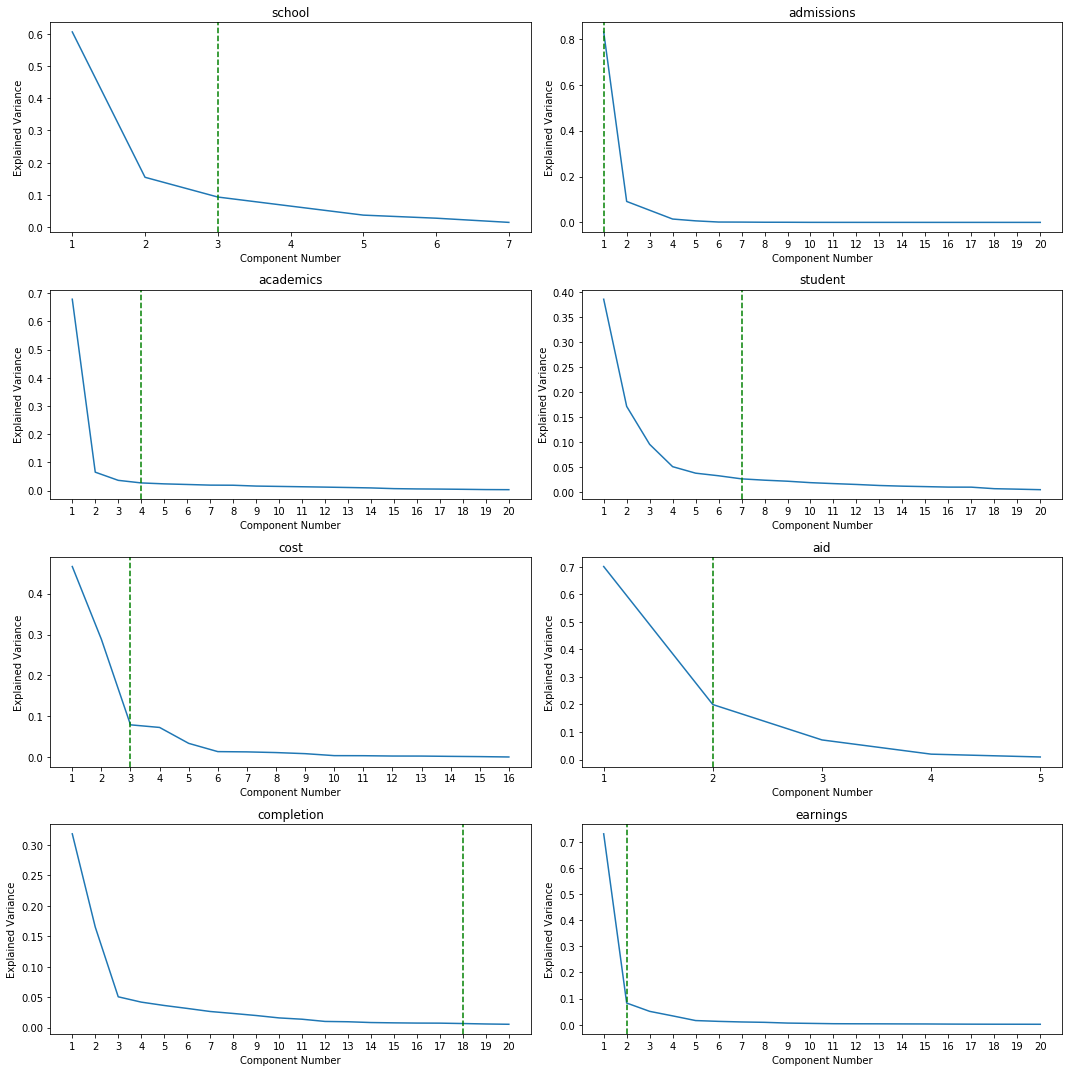

In [182]:
#pca = PCA(n_components=3)
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(15,15))
ncom=[3,2,4,7,3,2,12,5]
i=0
for cat in cat_list:
    variables=dic.loc[dic.category==cat,'name']
    XX=X.loc[:,np.array(variables)].fillna(0)
    pca=PCA(n_components=min(XX.shape[1],20))
    pca.fit(XX)
    ax=axes[i/2,i%2]
    ax.plot(range(1,(pca.n_components_+1)),pca.explained_variance_ratio_,label="x")
    ax.set_xlabel('Component Number')
    ax.set_ylabel('Explained Variance')
    ax.set_xticks(range(1,(pca.n_components_+1)))
    ax.set_title(cat)
    ax.axvline(PCA(0.8).fit(XX).n_components_,linestyle='--',color='g')
    #ax.axvline(ncom[i],linestyle='--',color='g')
    i=i+1
plt.tight_layout()

In [ ]:
# Linear Regression

In [190]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import validation_curve
import math

def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))


#pca = PCA(n_components=3)
var=0.8
X_trans=None
for cat in cat_list:
    variables=dic.loc[dic.category==cat,'name']
    XX=X.loc[:,np.array(variables)].fillna(0)
    pca=PCA(var)
    XX_trans=pca.fit_transform(XX)
    XX_trans=pd.DataFrame(XX_trans)
    X_trans=pd.concat([X_trans,XX_trans],axis=1)    
X_trans.shape
#validation_curve(LinearRegression(), X_trans, y, cv=10,scoring=rms_error)
cv = cross_val_score(LinearRegression(), X_trans, y/(1-y).apply(math.log), cv=10)
print cv
cv.mean()

[ 0.71547636  0.68547708  0.77768016  0.76032036  0.7410997   0.85045366
  0.81589783  0.83524288  0.81782435  0.73929179]


0.77387641804641316

In [191]:
y

0       -0.735886
1       -0.649100
2       -0.613610
3       -0.613853
4       -0.763716
5       -0.606163
6       -0.732289
7       -0.580942
8       -0.662535
9       -0.480381
10      -0.461678
11      -0.804782
13      -0.733654
14      -0.681457
15      -0.717460
16      -0.675969
19      -0.674413
21      -0.809434
22      -0.563825
23      -0.589413
25      -0.644127
27      -0.718219
28      -0.722724
29      -0.597871
31      -0.653813
33      -0.710754
34      -0.868174
35      -0.614824
36      -0.570168
37      -0.703996
           ...   
43858   -0.799779
43859   -0.671453
43860   -0.671453
43861   -0.754580
43862   -0.906048
43863   -0.906048
43864   -0.906048
43865   -0.906048
43866   -0.906048
43867   -0.937057
43868   -0.937057
43869   -0.906048
43870   -0.906048
43871   -0.906048
43872   -0.906048
43873   -0.906048
43874   -0.906048
43875   -0.906048
43876   -0.906048
43877   -0.906048
43878   -0.906048
43879   -0.906048
43880   -0.906048
43881   -0.906048
43882   -0

In [196]:
max(rpyrt0.RPY_1YR_RT)

-0.30936611258499519

In [200]:
max(np.log(y/(1-y)))

3.0376964723536095